### 1. PIP Install

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pIhDtR4hNgb67wEPdIuh")
project = rf.workspace("shaheds-workspace").project("construction-activities-fmp8")
version = project.version(2)
dataset = version.download("yolo26")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 130.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.92
    Uninstalling opencv-python-headless-4.13.0.92:
      Successfully uninstalled opencv-python-headless-4.13.0.92
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Construction-Activities---FMP8-2 in yolo26:: 100%|██████████| 345/345 [00:00<00:00, 1369.61it/s]


### 2. Train Model YOLOV8n

In [ ]:
### 4. Train model ###

!pip install ultralytics

import os

from ultralytics import YOLO

ROOT_DIR = "/content"

# Load a model
model = YOLO("yolov8n.pt")  # load pre trained model

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "Construction-Activities---FMP8-2/data.yaml"), epochs=30)  # train the model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.18 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Construction-Activities---FMP8-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=t

3. Display Class Names


In [ ]:
# Display the class names from the model
print("Class Names:")
print(model.names)

Class Names:
{0: 'Concrete', 1: 'Concrete Float', 2: 'Concrete Mixer Truck', 3: 'Concrete Pump Hose', 4: 'Concrete Pump Truck', 5: 'Concrete Trowel', 6: 'Excavation', 7: 'Steel-Reinforcement', 8: 'excavator'}


4. Evaluating

In [ ]:
# Inspect the training results to retrieve precision
# The results object is typically a DetMetrics object with 'box' attributes for detection

print("--- Final Training Metrics ---")
try:
    print(f"Mean Precision (mp): {results.box.mp:.4f}")
    print(f"Mean Recall (mr):    {results.box.mr:.4f}")
    print(f"mAP50:               {results.box.map50:.4f}")
    print(f"mAP50-95:            {results.box.map:.4f}")
except AttributeError:
    # Fallback if the object structure is different
    print("Could not access .box attributes directly. Printing full results dictionary:")
    if hasattr(results, 'results_dict'):
        print(results.results_dict)
    else:
        print(results)

--- Final Training Metrics ---
Mean Precision (mp): 0.7501
Mean Recall (mr):    0.3626
mAP50:               0.4178
mAP50-95:            0.2538


### 5. Train YOLOv8 Medium model with the specified configuration: *50* epochs, mosaic augmentation, and horizontal flipping.



In [ ]:
# Load the YOLOv8 Medium model
model_m = YOLO("yolov8m.pt")

# Train the model with improved configuration
results_m = model_m.train(
    data=os.path.join(ROOT_DIR, "Construction-Activities---FMP8-2/data.yaml"),
    epochs=50,
    mosaic=1.0,
    fliplr=0.5
)

Ultralytics 8.4.18 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Construction-Activities---FMP8-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pa

### 6. Re-Evaluluating



In [ ]:
# Validate the trained model to get final metrics
val_metrics = model_m.val()

print("\n--- Final Evaluation Metrics (YOLOv8m) ---")
print(f"Mean Precision (mp): {val_metrics.box.mp:.4f}")
print(f"Mean Recall (mr):    {val_metrics.box.mr:.4f}")
print(f"mAP50:               {val_metrics.box.map50:.4f}")
print(f"mAP50-95:            {val_metrics.box.map:.4f}")

Ultralytics 8.4.18 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 93 layers, 25,844,971 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3635.5±1676.7 MB/s, size: 398.4 KB)
val: Scanning /content/Construction-Activities---FMP8-2/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 25/25 8.7Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 83, len(boxes) = 94. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.2s/it 2.4s
                   all         25         94      0.793      0.361      0.454      0.307
              Concrete          8         13      0.817      0.769      0.772      0.578
    Concrete Pump Hose 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to the results CSV
results_path = '/content/runs/detect/train3/results.csv'

# Check if file exists
if os.path.exists(results_path):
    # Load data
    df = pd.read_csv(results_path)

    # Strip whitespace from column names to handle inconsistent formatting
    df.columns = df.columns.str.strip()

    # Create subplots for the losses
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    # Plot Box Loss
    if 'train/box_loss' in df.columns and 'val/box_loss' in df.columns:
        ax[0].plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
        ax[0].plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
        ax[0].set_title('Box Loss')
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')
        ax[0].legend()
        ax[0].grid(True)

    # Plot Class Loss
    if 'train/cls_loss' in df.columns and 'val/cls_loss' in df.columns:
        ax[1].plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss')
        ax[1].plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')
        ax[1].set_title('Class Loss')
        ax[1].set_xlabel('Epoch')
        ax[1].set_ylabel('Loss')
        ax[1].legend()
        ax[1].grid(True)

    # Plot DFL Loss
    if 'train/dfl_loss' in df.columns and 'val/dfl_loss' in df.columns:
        ax[2].plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
        ax[2].plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss')
        ax[2].set_title('DFL Loss')
        ax[2].set_xlabel('Epoch')
        ax[2].set_ylabel('Loss')
        ax[2].legend()
        ax[2].grid(True)

    plt.tight_layout()
    plt.show()

    # Also display the mAP50 curve to see performance trends
    plt.figure(figsize=(10, 5))
    if 'metrics/mAP50(B)' in df.columns:
        plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50', color='green')
        plt.title('Mean Average Precision (mAP50) over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('mAP50')
        plt.legend()
        plt.grid(True)
        plt.show()

else:
    print(f"Could not find results file at {results_path}")

Could not find results file at /content/runs/detect/train3/results.csv


### 7. all plot visible

In [ ]:
import os
from IPython.display import Image, display

# Define the run directory based on previous logs
run_dir = '/content/runs/detect/train3'

print(f"Displaying plots from: {run_dir}")

# List of key plots to display
plots_to_show = [
    'results.png',          # Summary of losses and metrics
    'confusion_matrix.png', # Class-wise performance
    'PR_curve.png'          # Precision-Recall curve
]

for plot_name in plots_to_show:
    plot_path = os.path.join(run_dir, plot_name)
    if os.path.exists(plot_path):
        print(f"\n--- {plot_name} ---")
        display(Image(filename=plot_path))
    else:
        print(f"\n{plot_name} not found in {run_dir}")

Displaying plots from: /content/runs/detect/train3

results.png not found in /content/runs/detect/train3

confusion_matrix.png not found in /content/runs/detect/train3

PR_curve.png not found in /content/runs/detect/train3


### 8. Metrics, F1, PR

Fetching metrics from latest run: /content/runs/detect/train2

--- Confusion Matrix ---


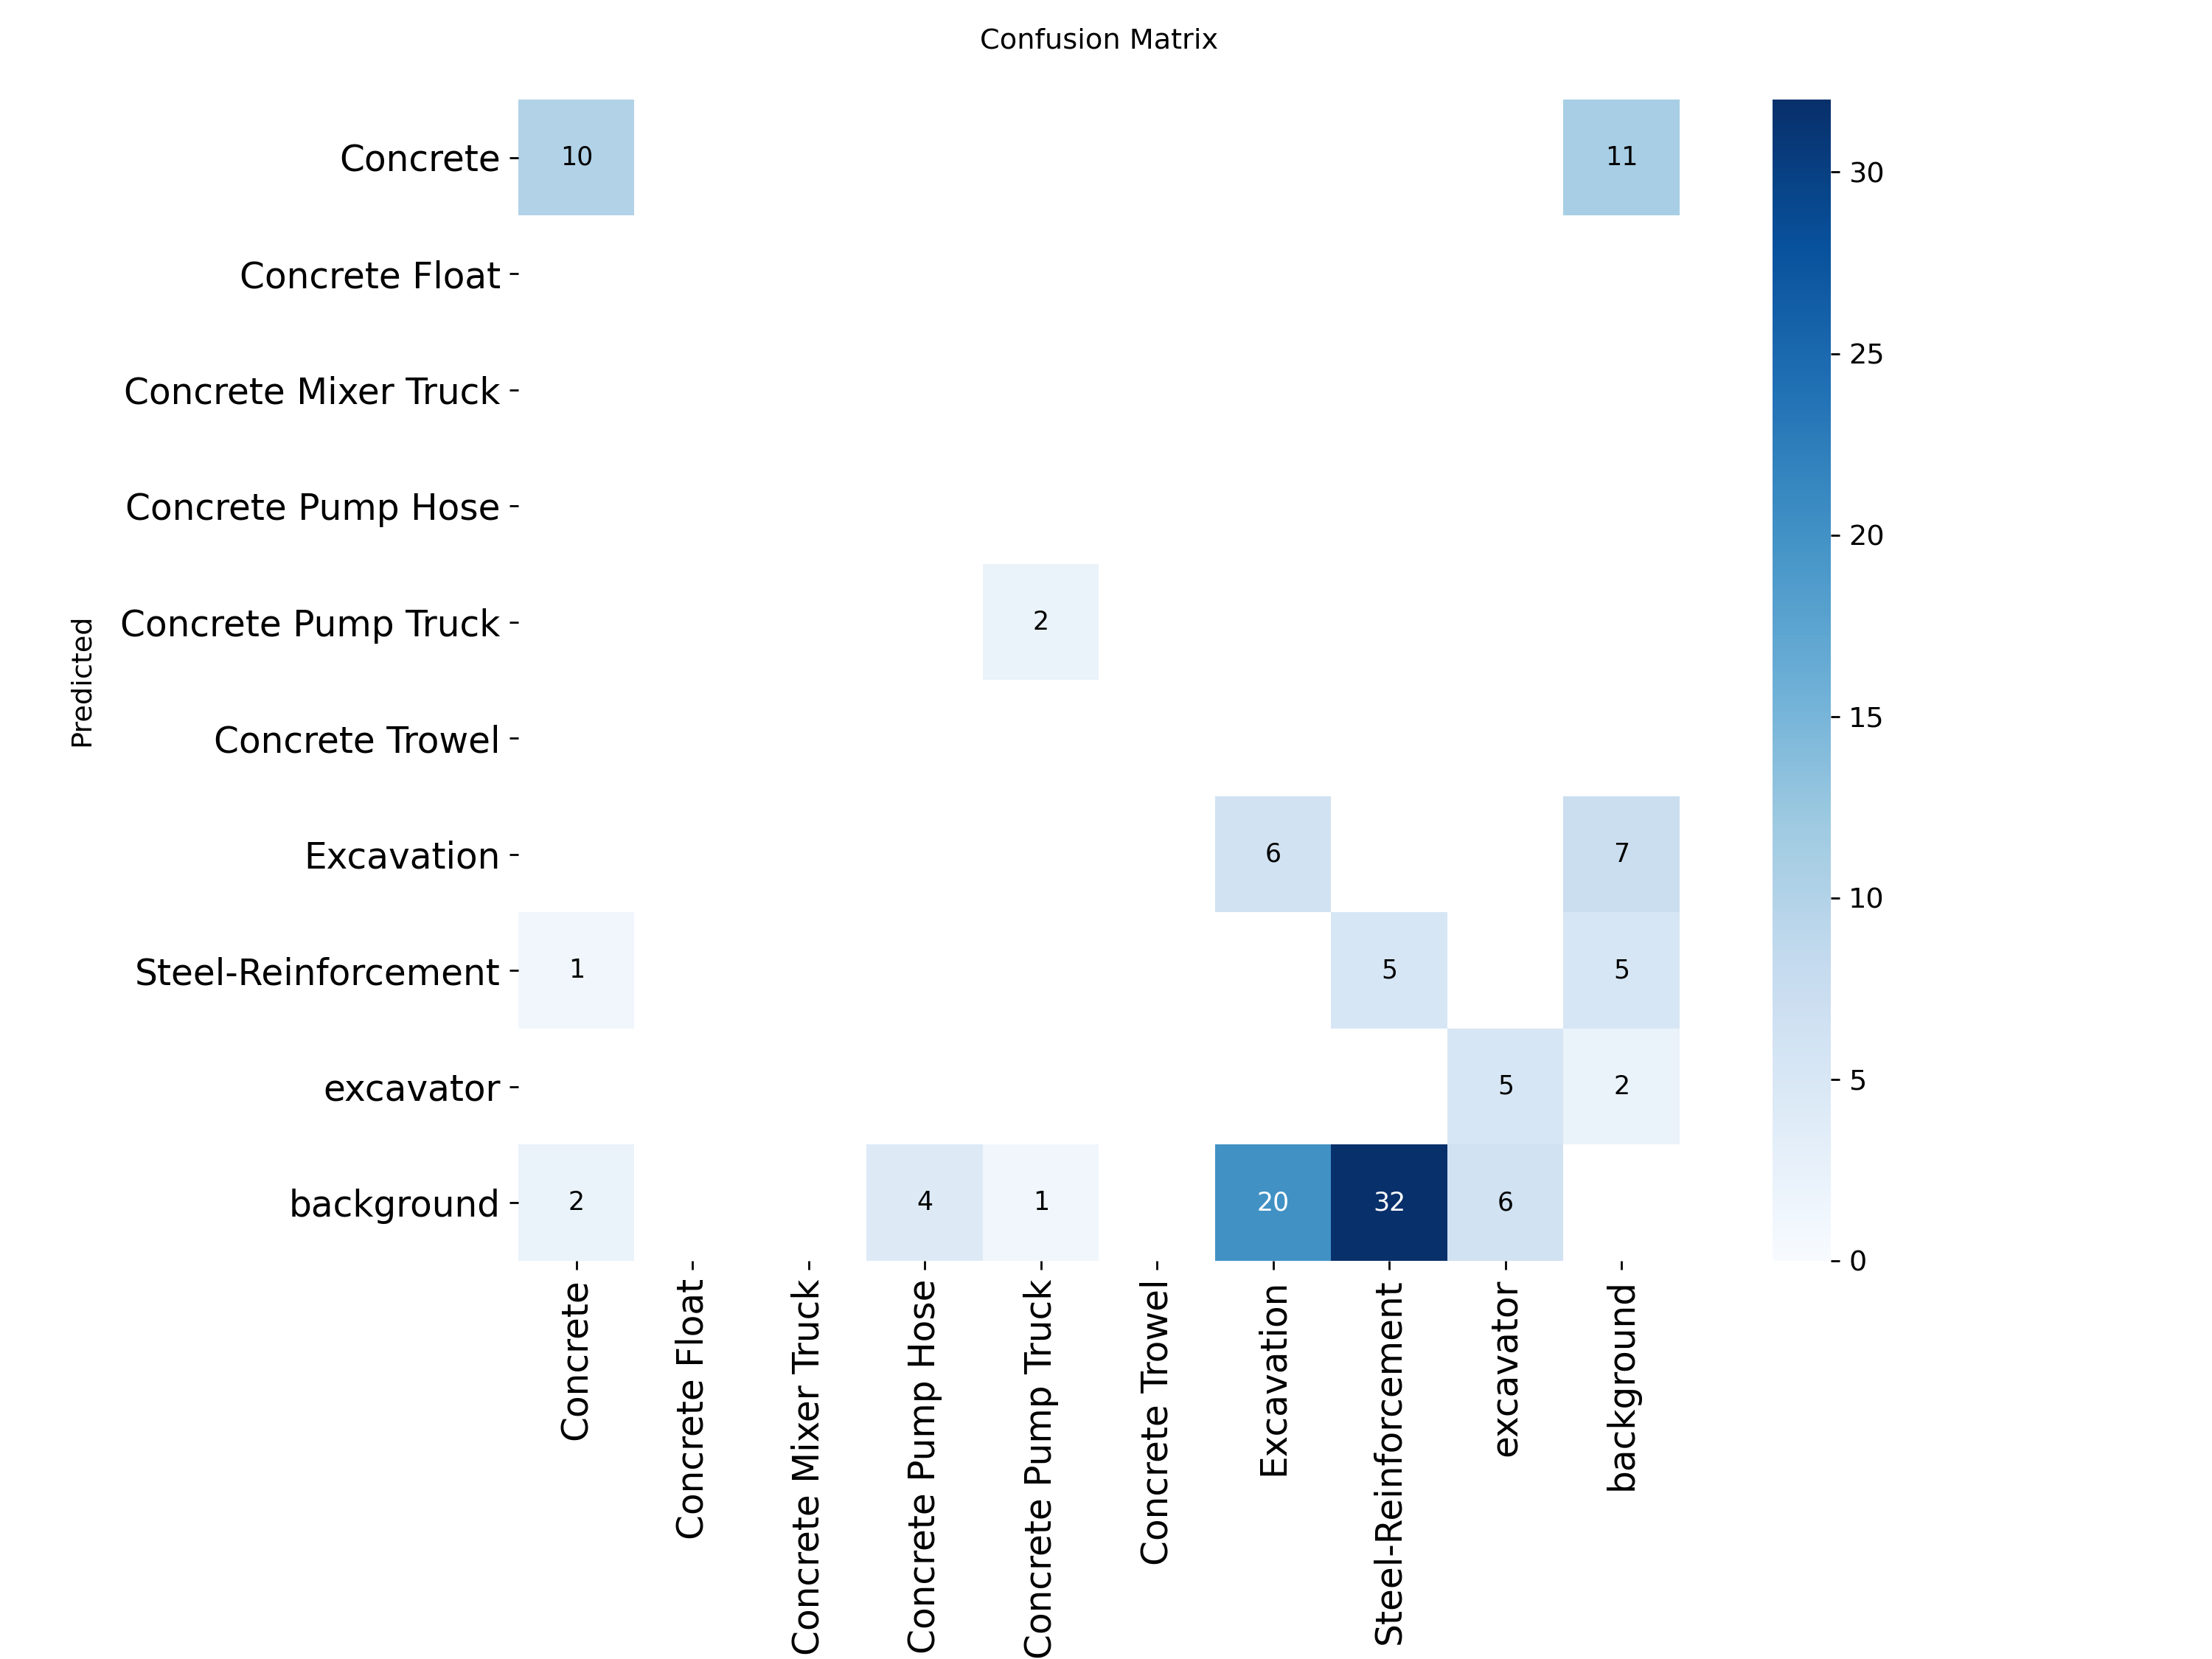


--- F1 Curve ---


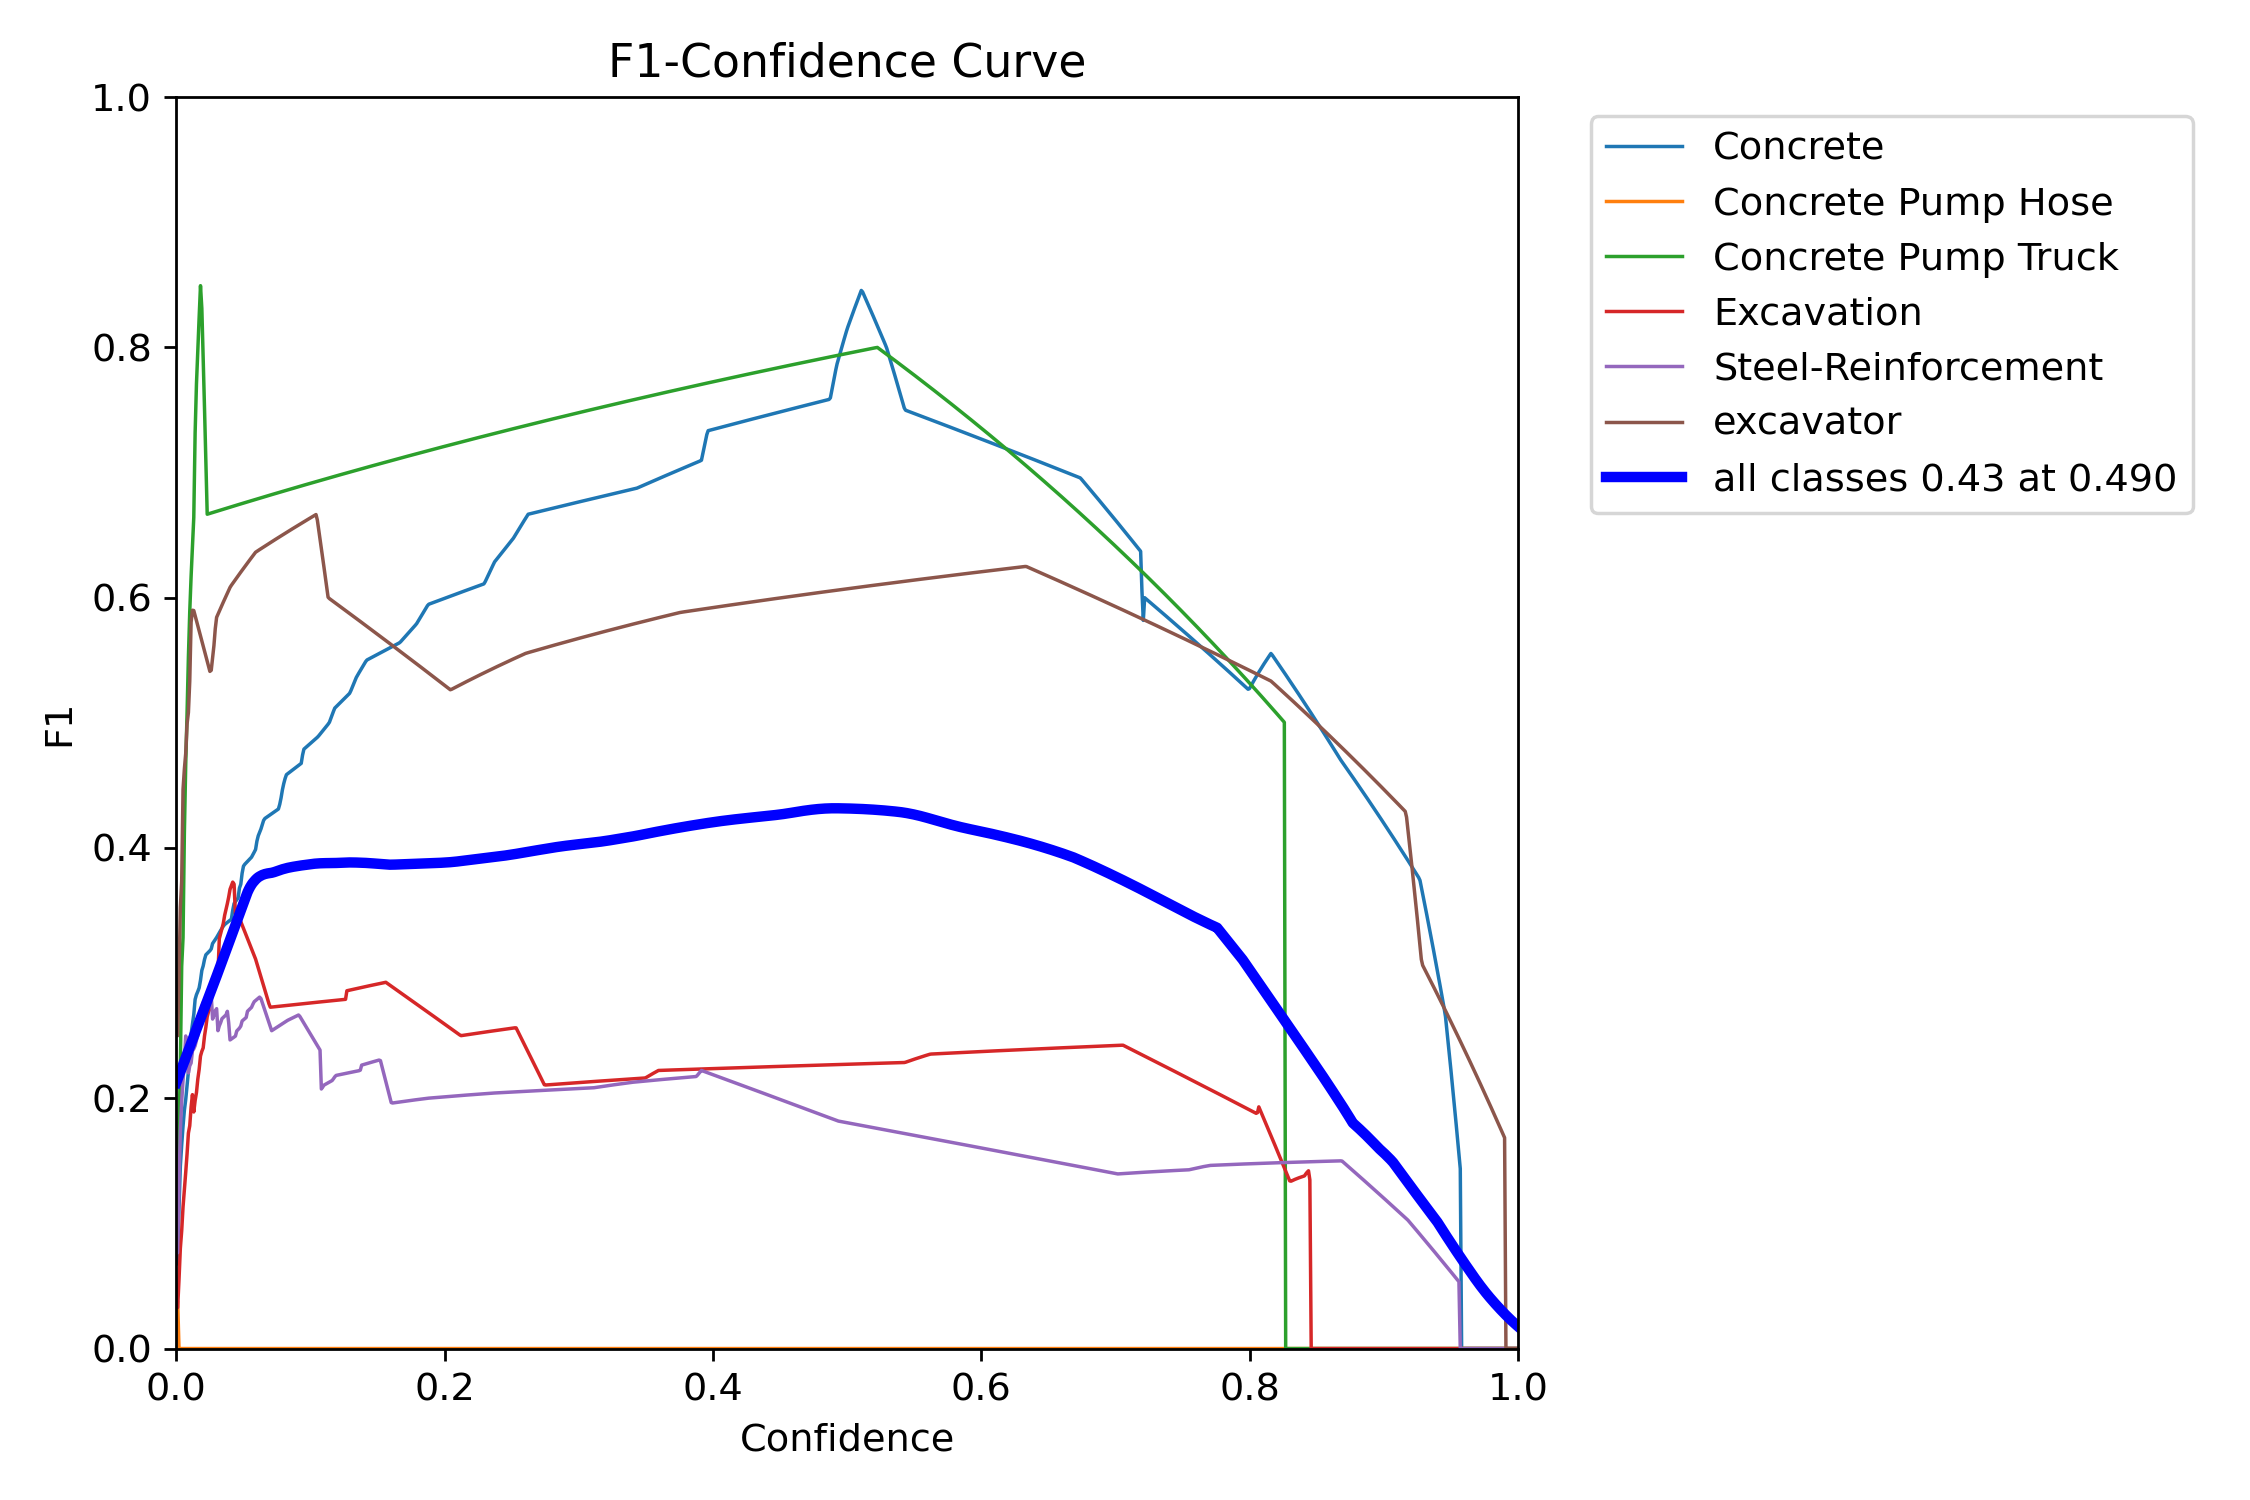


--- P/R Curve ---


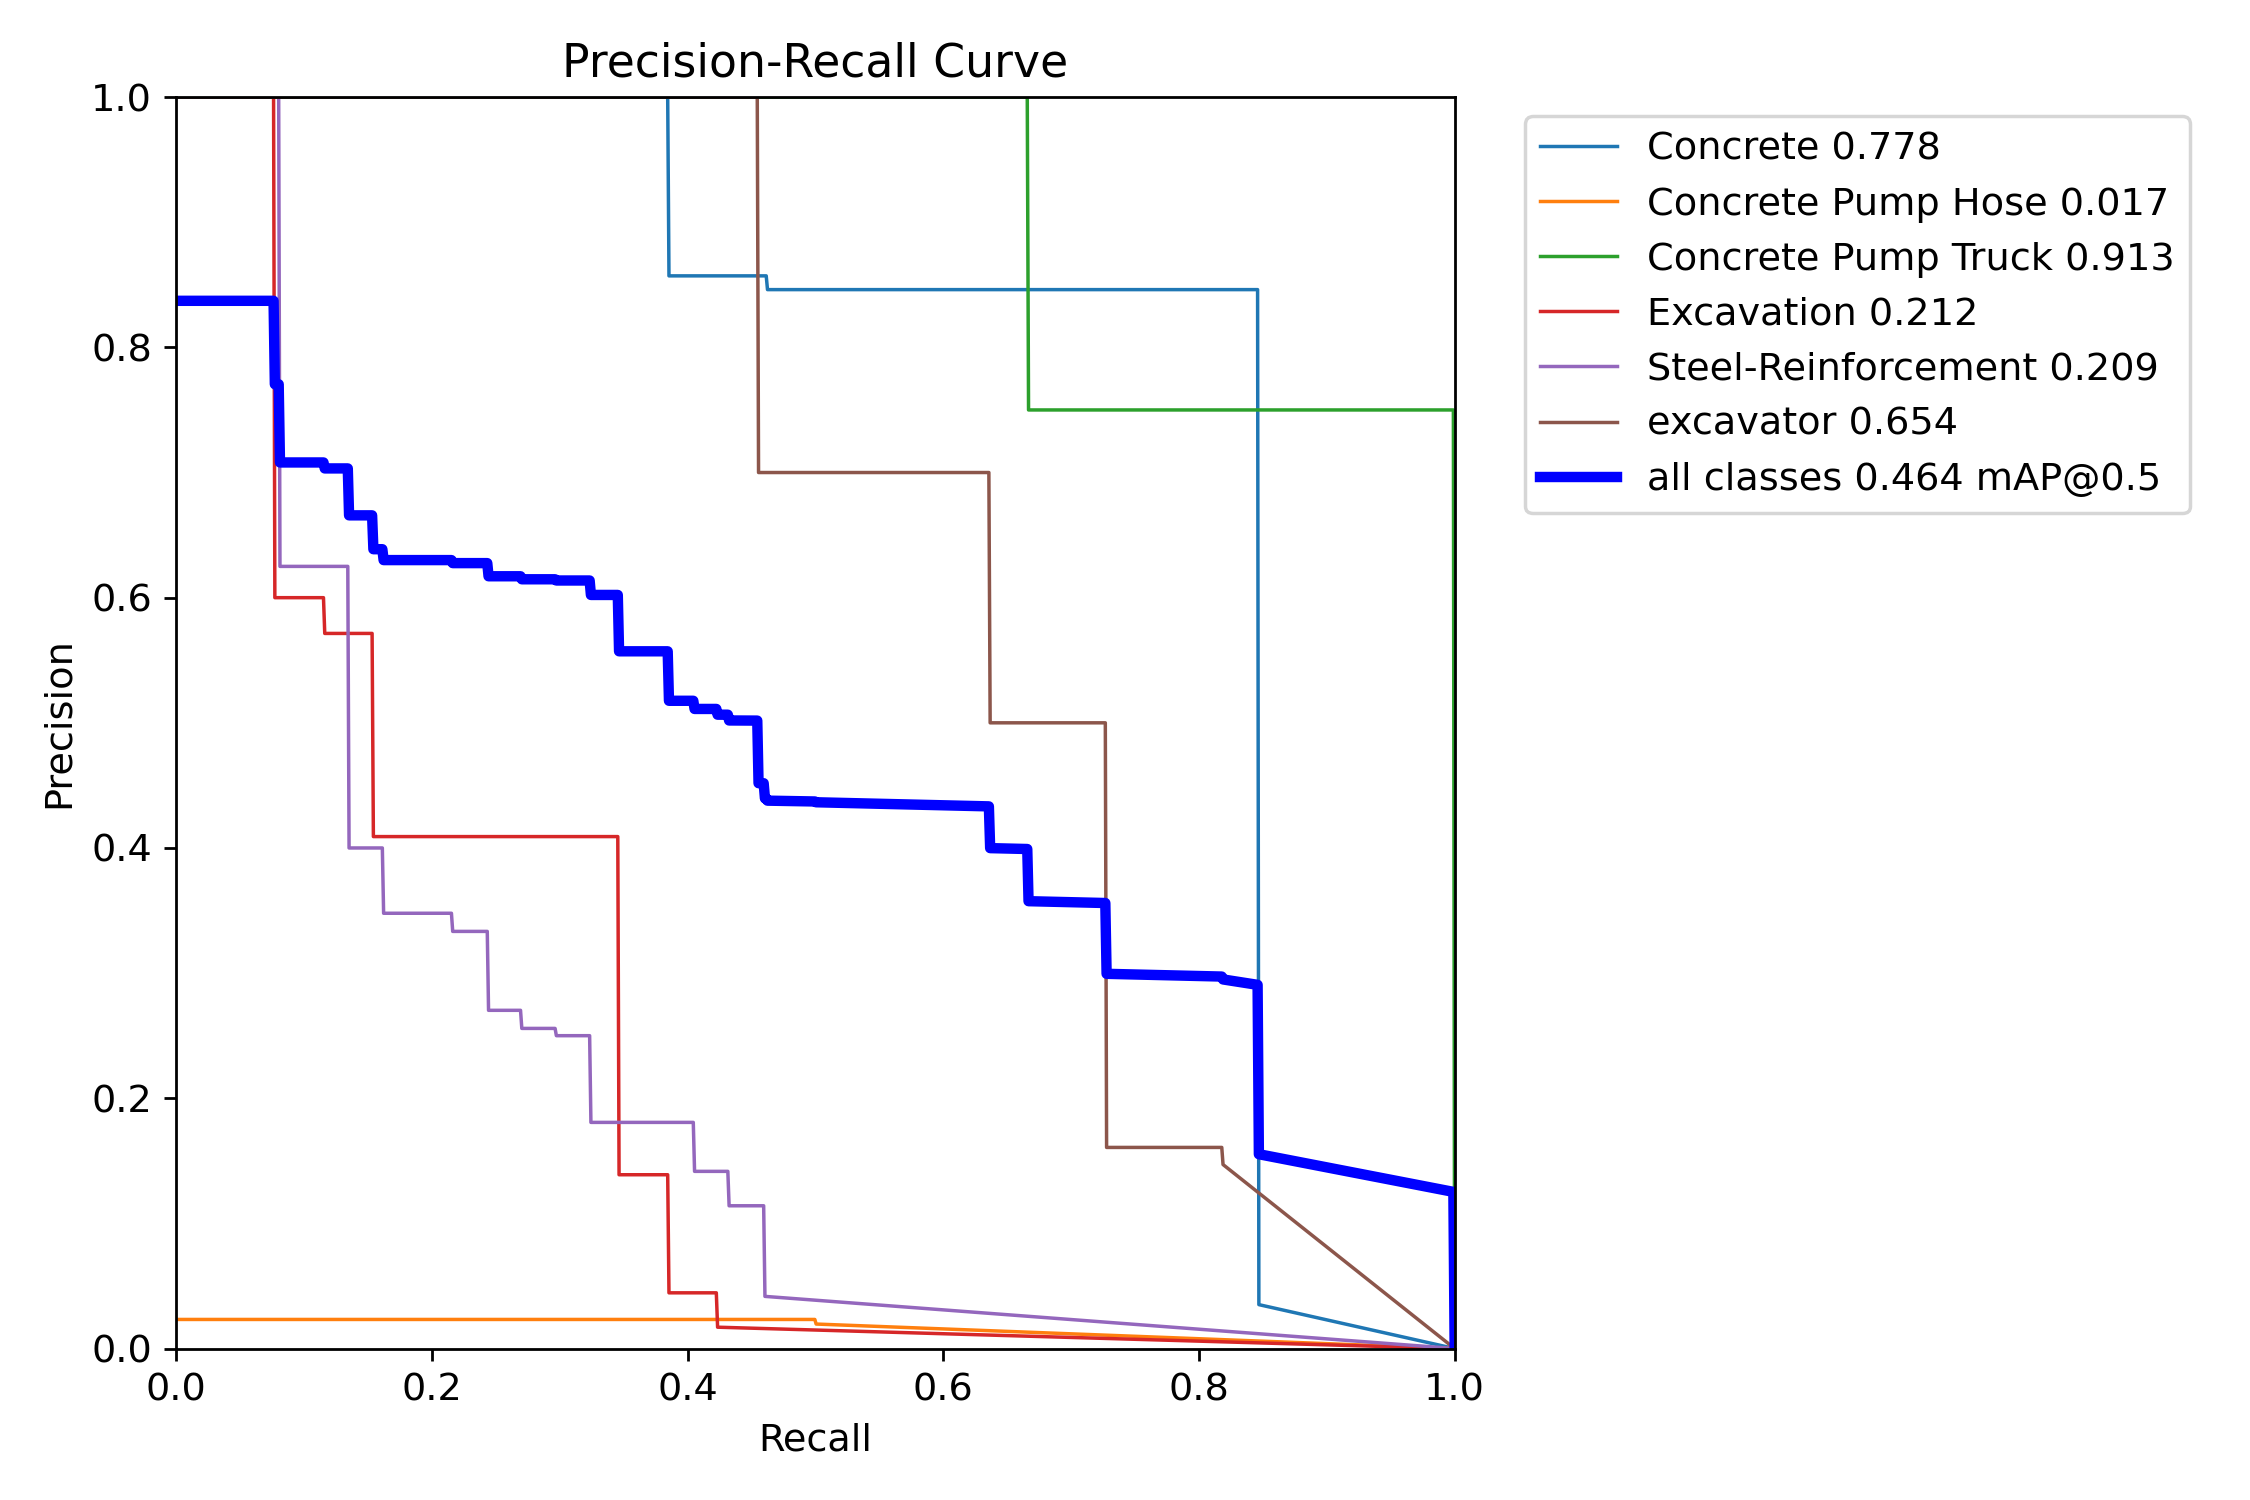

In [ ]:
import os
import shutil
from glob import glob
from IPython.display import Image, display

# 1. Find the latest training run directory
runs = sorted(glob('/content/runs/detect/train*'), key=os.path.getmtime)

if runs:
    latest_run = runs[-1]
    print(f"Fetching metrics from latest run: {latest_run}")

    # 2. Create target directory
    target_dir = "/content/results/metrics/"
    os.makedirs(target_dir, exist_ok=True)

    # 3. Define plots to search for (handling different naming conventions)
    metrics_to_show = {
        "Confusion Matrix": ["confusion_matrix.png"],
        "F1 Curve": ["BoxF1_curve.png", "F1_curve.png"],
        "P/R Curve": ["BoxPR_curve.png", "PR_curve.png"]
    }

    for metric_name, potential_filenames in metrics_to_show.items():
        file_found = False
        for fname in potential_filenames:
            src = os.path.join(latest_run, fname)
            if os.path.exists(src):
                dst = os.path.join(target_dir, fname)
                shutil.copy(src, dst)
                print(f"\n--- {metric_name} ---")
                display(Image(filename=dst))
                file_found = True
                break

        if not file_found:
            print(f"\nWarning: {metric_name} not found in {latest_run}")

else:
    print("No training runs found.")

###9. export all plot visible as ZIP file

In [ ]:
import shutil
from google.colab import files
import os

# Define paths
source_dir = "/content/results/metrics/"
output_filename = "/content/metrics_export"
zip_path = f"{output_filename}.zip"

# Check if source exists before zipping
if os.path.exists(source_dir):
    # Create the ZIP archive
    shutil.make_archive(output_filename, 'zip', source_dir)
    print(f"Successfully created ZIP file at: {zip_path}")

    # Trigger the download
    try:
        files.download(zip_path)
    except Exception as e:
        print(f"Auto-download failed. You can download '{zip_path}' manually from the file explorer.")
else:
    print(f"Source directory {source_dir} not found. Please ensure the metrics were generated successfully.")

Successfully created ZIP file at: /content/metrics_export.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 10. export metric as ZIP file

In [ ]:
import os
import shutil
from glob import glob
from google.colab import files

# 1. Find the latest training run directory
runs = sorted(glob('/content/runs/detect/train*'), key=os.path.getmtime)

if runs:
    latest_run = runs[-1]
    print(f"Collecting all visible plots from: {latest_run}")

    # 2. Prepare export directory
    export_dir = "/content/all_plots_export"
    if os.path.exists(export_dir):
        shutil.rmtree(export_dir)
    os.makedirs(export_dir)

    # 3. Copy all PNG files (plots/curves)
    png_files = glob(os.path.join(latest_run, "*.png"))

    if png_files:
        for png_file in png_files:
            shutil.copy(png_file, export_dir)

        print(f"Copied {len(png_files)} plot files to {export_dir}")

        # 4. Zip and Download
        output_filename = "/content/all_plots_visible"
        shutil.make_archive(output_filename, 'zip', export_dir)
        print(f"Created {output_filename}.zip")

        try:
            files.download(f"{output_filename}.zip")
        except Exception as e:
            print("Auto-download failed. You can download the zip file manually from the file explorer.")
    else:
        print("No PNG files (plots) found in the run directory.")
else:
    print("No training runs found.")

Copied 7 plot files to /content/all_plots_export
Created /content/all_plots_visible.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 11. Displaying 14 random images result

Loading model weights from: /content/runs/detect/train2/weights/best.pt
Running inference on 14 random images...


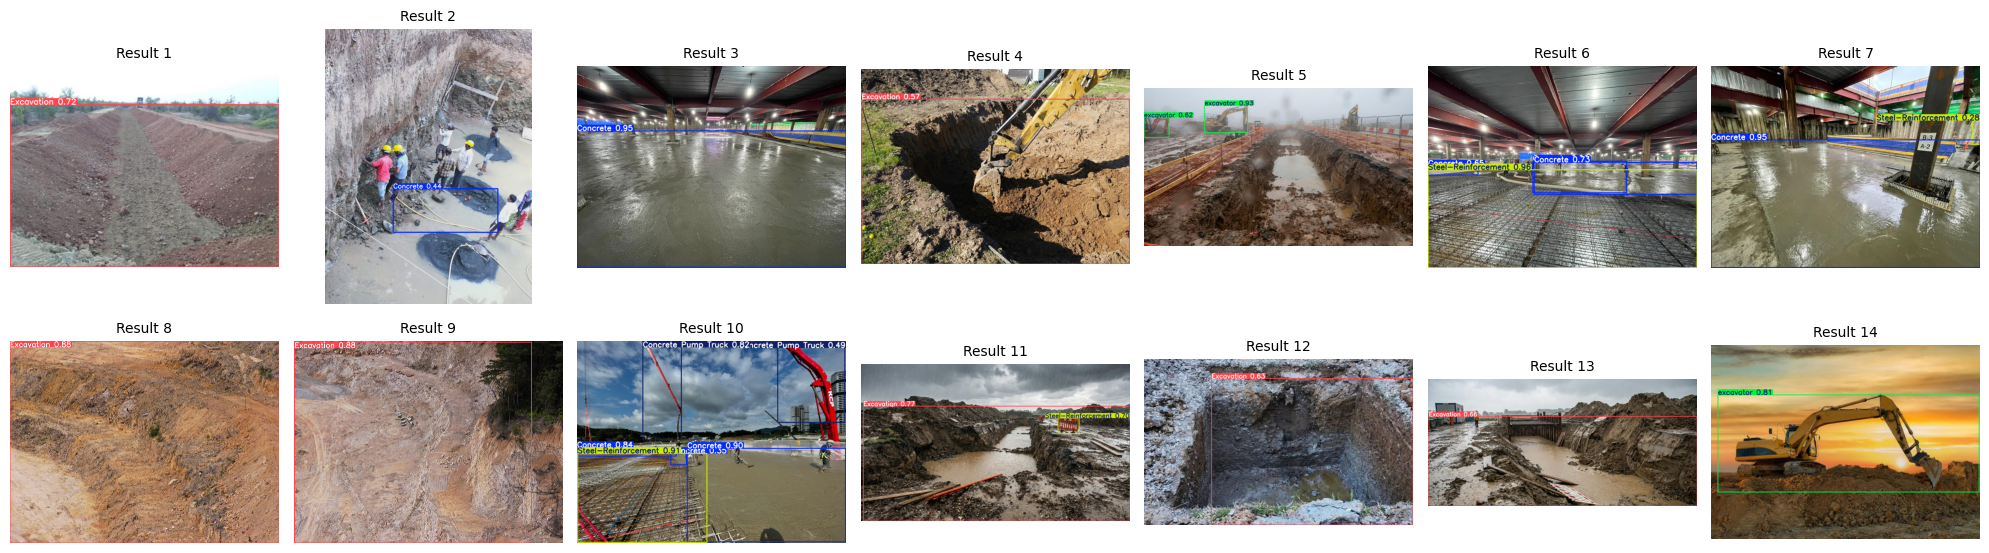

In [ ]:
import os
import random
import glob
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 1. Locate the best model from the latest run
runs = sorted(glob.glob('/content/runs/detect/train*'), key=os.path.getmtime)

if runs:
    latest_run = runs[-1]
    best_weight_path = os.path.join(latest_run, "weights/best.pt")

    if os.path.exists(best_weight_path):
        print(f"Loading model weights from: {best_weight_path}")
        model = YOLO(best_weight_path)

        # 2. Define path to validation images
        val_img_dir = "/content/Construction-Activities---FMP8-2/valid/images"
        all_val_images = glob.glob(os.path.join(val_img_dir, "*"))

        # Filter for valid image extensions just in case
        valid_exts = {'.jpg', '.jpeg', '.png', '.bmp', '.webp'}
        all_val_images = [f for f in all_val_images if os.path.splitext(f)[1].lower() in valid_exts]

        if len(all_val_images) > 0:
            # 3. Select 14 random images (or all if less than 14)
            num_images = min(14, len(all_val_images))
            selected_images = random.sample(all_val_images, num_images)

            print(f"Running inference on {num_images} random images...")
            results = model.predict(selected_images, verbose=False)

            # 4. Display results in a grid
            cols = 7
            rows = (num_images + cols - 1) // cols  # Ceiling division

            plt.figure(figsize=(20, 3 * rows))

            for i, result in enumerate(results):
                # result.plot() returns the image as a BGR numpy array
                img_bgr = result.plot()
                img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

                plt.subplot(rows, cols, i + 1)
                plt.imshow(img_rgb)
                plt.axis('off')
                plt.title(f"Result {i+1}", fontsize=10)

            plt.tight_layout()
            plt.show()
        else:
            print(f"No images found in {val_img_dir}")
    else:
        print(f"Weights not found at {best_weight_path}")
else:
    print("No training runs found.")

### 12 Generating pt file

In [ ]:
import torch
import os
from google.colab import files

# ────────────────────────────────────────────────────────────────
#  CONFIGURATION — edit these
# ────────────────────────────────────────────────────────────────
MODEL_VARIABLE  = model          # 🔁 replace with your model variable
SAVE_PATH       = "my_model.pt"  # 📝 output filename
SAVE_MODE       = "weights"      # options: "weights" | "full" | "checkpoint"

# Only needed if SAVE_MODE = "checkpoint"
OPTIMIZER       = None           # e.g. optimizer
CURRENT_EPOCH   = None           # e.g. epoch
CURRENT_LOSS    = None           # e.g. loss.item()
# ────────────────────────────────────────────────────────────────

def export_model(model, path, mode="weights", optimizer=None, epoch=None, loss=None):
    print(f"📦 Saving model in [{mode}] mode...")

    if mode == "weights":
        torch.save(model.state_dict(), path)

    elif mode == "full":
        torch.save(model, path)

    elif mode == "checkpoint":
        torch.save({
            "epoch"               : epoch,
            "model_state_dict"    : model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict() if optimizer else None,
            "loss"                : loss,
        }, path)

    else:
        raise ValueError(f"Unknown mode: {mode}. Choose from: weights | full | checkpoint")

    size_mb = os.path.getsize(path) / (1024 * 1024)
    print(f"✅ Saved successfully → {path}  ({size_mb:.2f} MB)")
    print(f"⬇️  Starting download...")
    files.download(path)
    print("🎉 Done!")


export_model(
    model     = MODEL_VARIABLE,
    path      = SAVE_PATH,
    mode      = SAVE_MODE,
    optimizer = OPTIMIZER,
    epoch     = CURRENT_EPOCH,
    loss      = CURRENT_LOSS,
)

📦 Saving model in [weights] mode...
✅ Saved successfully → my_model.pt  (98.66 MB)
⬇️  Starting download...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🎉 Done!


### 13 extract pt

In [ ]:
!git clone https://github.com/rezk9712-star/AECO-Safety-Detection-YOLOv8.git

Cloning into 'AECO-Safety-Detection-YOLOv8'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 140 (delta 14), reused 7 (delta 1), pack-reused 104 (from 2)
Receiving objects: 100% (140/140), 131.04 MiB | 62.29 MiB/s, done.
Resolving deltas: 100% (49/49), done.


### 14 import Github

In [ ]:
import os
import shutil

# Define source and destination
repo_root = "/content/AECO-Safety-Detection-YOLOv8"
dest_dir = os.path.join(repo_root, "notebooks/Train")
dest_filename = "AECO-Safety-Detection-YOLOv8_Model.pt"

# Check which file exists to copy (handling potential naming mismatch)
possible_sources = [
    "/content/AECO-Safety-Detection-YOLOv8_Model.pt",
    "/content/my_model.pt"  # From previous cell execution
]

source_file = None
for src in possible_sources:
    if os.path.exists(src):
        source_file = src
        break

if source_file:
    # Create destination directory if it doesn't exist
    os.makedirs(dest_dir, exist_ok=True)

    dest_path = os.path.join(dest_dir, dest_filename)
    shutil.copy(source_file, dest_path)

    print(f"✅ Successfully copied '{source_file}' to:\n   '{dest_path}'")
    print("\nTo push this to GitHub, you will need to run the following commands manually in a terminal or cell after authenticating:")
    print(f"  %cd {repo_root}")
    print(f"  !git add notebooks/Train/{dest_filename}")
    print(f"  !git commit -m 'Add trained model'")
    print(f"  !git push origin main")
else:
    print(f"❌ Could not find the source file. Checked: {possible_sources}")

✅ Successfully copied '/content/my_model.pt' to:
   '/content/AECO-Safety-Detection-YOLOv8/notebooks/Train/AECO-Safety-Detection-YOLOv8_Model.pt'

To push this to GitHub, you will need to run the following commands manually in a terminal or cell after authenticating:
  %cd /content/AECO-Safety-Detection-YOLOv8
  !git add notebooks/Train/AECO-Safety-Detection-YOLOv8_Model.pt
  !git commit -m 'Add trained model'
  !git push origin main


### 15 Display Final Results

In [17]:
import pandas as pd
from google.colab import files

# Create a dictionary of the metrics
metrics_data = {
    "Metric": ["Precision", "Recall", "mAP @ 50", "mAP 50-95"],
    "Value": [
        val_metrics.box.mp,
        val_metrics.box.mr,
        val_metrics.box.map50,
        val_metrics.box.map
    ]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Save to CSV
csv_filename = "final_metrics.csv"
metrics_df.to_csv(csv_filename, index=False)
print(f"Metrics saved to {csv_filename}")

# Download the file
files.download(csv_filename)

Metrics saved to final_metrics.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# Display Overall Metrics
print("\n--- Overall Final Results ---")
print(f"Precision:   {val_metrics.box.mp:.4f}")
print(f"Recall:      {val_metrics.box.mr:.4f}")
print(f"mAP @ 50:    {val_metrics.box.map50:.4f}")
print(f"mAP 50-95:   {val_metrics.box.map:.4f}")

# Display Per-Class Metrics
print("\n--- Per-Class Breakdown ---")
# The .names attribute is a dict {id: name}
# The .maps attribute is an array of mAP50-95 per class
# Note: accessing per-class P/R/mAP50 from val_metrics directly is complex without the internal arrays,
# but we can print the mAP50-95 which is readily available in .maps if it aligns with .names keys.

names = val_metrics.names
if hasattr(val_metrics.box, 'maps'):
    class_maps = val_metrics.box.maps
    print(f"{'Class':<25} | {'mAP 50-95':<10}")
    print("-" * 40)
    for class_id, class_name in names.items():
        # Safety check to ensure we don't go out of bounds if indices don't match perfectly
        if class_id < len(class_maps):
            print(f"{class_name:<25} | {class_maps[class_id]:.4f}")
else:
    print("Detailed per-class mAP array not directly accessible via .maps")


--- Overall Final Results ---
Precision:   0.7934
Recall:      0.3613
mAP @ 50:    0.4536
mAP 50-95:   0.3074

--- Per-Class Breakdown ---
Class                     | mAP 50-95 
----------------------------------------
Concrete                  | 0.5784
Concrete Float            | 0.3074
Concrete Mixer Truck      | 0.3074
Concrete Pump Hose        | 0.0023
Concrete Pump Truck       | 0.5754
Concrete Trowel           | 0.3074
Excavation                | 0.0693
Steel-Reinforcement       | 0.1231
excavator                 | 0.4961


### 16 Display exceeded or met Target

In [19]:
# Define target threshold (0.5 represents 50% mAP)
TARGET_MAP = 0.5

print(f"\n--- Classes Meeting or Exceeding Target mAP of {TARGET_MAP} ---")

# Get class names and their specific mAP50-95 values
names = val_metrics.names
if hasattr(val_metrics.box, 'maps'):
    class_maps = val_metrics.box.maps
    met_count = 0

    print(f"{'Class':<25} | {'mAP 50-95':<10} | {'Status'}")
    print("-" * 55)

    for class_id, class_name in names.items():
        if class_id < len(class_maps):
            metric_value = class_maps[class_id]

            if metric_value >= TARGET_MAP:
                status = "Exceeded" if metric_value > TARGET_MAP else "Met"
                print(f"✅ {class_name:<25} | {metric_value:.4f}     | {status}")
                met_count += 1

    if met_count == 0:
        print(f"\nNo classes met the target of {TARGET_MAP}")
    else:
        print(f"\nTotal: {met_count} classes met or exceeded the target.")
else:
    print("Detailed per-class mAP array not directly accessible.")


--- Classes Meeting or Exceeding Target mAP of 0.5 ---
Class                     | mAP 50-95  | Status
-------------------------------------------------------
✅ Concrete                  | 0.5784     | Exceeded
✅ Concrete Pump Truck       | 0.5754     | Exceeded

Total: 2 classes met or exceeded the target.


### 17 Extract Result and Exceeded as ZIP

In [20]:
import pandas as pd
import shutil
import os
from google.colab import files

# Create a directory for the report
report_dir = 'final_report'
os.makedirs(report_dir, exist_ok=True)

# 1. Save Overall Metrics
overall_data = {
    "Metric": ["Precision", "Recall", "mAP @ 50", "mAP 50-95"],
    "Value": [
        val_metrics.box.mp,
        val_metrics.box.mr,
        val_metrics.box.map50,
        val_metrics.box.map
    ]
}
df_overall = pd.DataFrame(overall_data)
df_overall.to_csv(os.path.join(report_dir, 'overall_metrics.csv'), index=False)

# 2. Save Per-Class Metrics & Target Status
TARGET_MAP = 0.5
class_data = []

names = val_metrics.names
if hasattr(val_metrics.box, 'maps'):
    class_maps = val_metrics.box.maps
    for class_id, class_name in names.items():
        if class_id < len(class_maps):
            val = class_maps[class_id]

            # Determine Status
            if val > TARGET_MAP:
                status = "Exceeded"
            elif val == TARGET_MAP:
                status = "Met"
            else:
                status = "Below Target"

            class_data.append({
                "Class": class_name,
                "mAP_50_95": val,
                "Target_Threshold": TARGET_MAP,
                "Status": status
            })

df_class = pd.DataFrame(class_data)
df_class.to_csv(os.path.join(report_dir, 'per_class_metrics.csv'), index=False)

print(f"Generated report files in '{report_dir}' directory.")
print(df_class.head()) # Display preview

# 3. Zip and Download
output_zip = 'final_results_report'
shutil.make_archive(output_zip, 'zip', report_dir)
print(f"\nZipped report to {output_zip}.zip")

files.download(f"{output_zip}.zip")

Generated report files in 'final_report' directory.
                  Class  mAP_50_95  Target_Threshold        Status
0              Concrete   0.578440               0.5      Exceeded
1        Concrete Float   0.307426               0.5  Below Target
2  Concrete Mixer Truck   0.307426               0.5  Below Target
3    Concrete Pump Hose   0.002334               0.5  Below Target
4   Concrete Pump Truck   0.575380               0.5      Exceeded

Zipped report to final_results_report.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>